<a href="https://colab.research.google.com/github/wulanasyifaa/mushroom_clasiification/blob/main/Analysis_of_Logistic_Regression%2C_Random_Forest%2C_and_Gradient_Boosting_Variants_for_Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mushroom Dataset Description

Source: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

### Target Variable:
| Variable | Type  | Description |
|----------|------|-------------|
| class    | binary | Edible (`e`) or Poisonous (`p`) |

### Features:
| No  | Variable            | Type | Description |
|----|---------------------|------|-------------|
| 1  | cap-diameter       | m    | Float number in cm |
| 2  | cap-shape          | n    | Bell (`b`), Conical (`c`), Convex (`x`), Flat (`f`), Sunken (`s`), Spherical (`p`), Others (`o`) |
| 3  | cap-surface        | n    | Fibrous (`i`), Grooves (`g`), Scaly (`y`), Smooth (`s`), Shiny (`h`), Leathery (`l`), Silky (`k`), Sticky (`t`), Wrinkled (`w`), Fleshy (`e`) |
| 4  | cap-color          | n    | Brown (`n`), Buff (`b`), Gray (`g`), Green (`r`), Pink (`p`), Purple (`u`), Red (`e`), White (`w`), Yellow (`y`), Blue (`l`), Orange (`o`), Black (`k`) |
| 5  | does-bruise-bleed  | n    | Bruises/Bleeding (`t`), No (`f`) |
| 6  | gill-attachment    | n    | Adnate (`a`), Adnexed (`x`), Decurrent (`d`), Free (`e`), Sinuate (`s`), Pores (`p`), None (`f`), Unknown (`?`) |
| 7  | gill-spacing       | n    | Close (`c`), Distant (`d`), None (`f`) |
| 8  | gill-color         | n    | Same as `cap-color` + None (`f`) |
| 9  | stem-height        | m    | Float number in cm |
| 10 | stem-width         | m    | Float number in mm |
| 11 | stem-root          | n    | Bulbous (`b`), Swollen (`s`), Club (`c`), Cup (`u`), Equal (`e`), Rhizomorphs (`z`), Rooted (`r`) |
| 12 | stem-surface       | n    | Same as `cap-surface` + None (`f`) |
| 13 | stem-color         | n    | Same as `cap-color` + None (`f`) |
| 14 | veil-type          | n    | Partial (`p`), Universal (`u`) |
| 15 | veil-color         | n    | Same as `cap-color` + None (`f`) |
| 16 | has-ring           | n    | Ring (`t`), None (`f`) |
| 17 | ring-type          | n    | Cobwebby (`c`), Evanescent (`e`), Flaring (`r`), Grooved (`g`), Large (`l`), Pendant (`p`), Sheathing (`s`), Zone (`z`), Scaly (`y`), Movable (`m`), None (`f`), Unknown (`?`) |
| 18 | spore-print-color  | n    | Same as `cap-color` |
| 19 | habitat            | n    | Grasses (`g`), Leaves (`l`), Meadows (`m`), Paths (`p`), Heaths (`h`), Urban (`u`), Waste (`w`), Woods (`d`) |
| 20 | season             | n    | Spring (`s`), Summer (`u`), Autumn (`a`), Winter (`w`) |

- **n**: Nominal  
- **m**: Metrical (Continuous)  

**Jumlah Data:**
Dataset ini terdiri dari 61.069 baris (entries) dan 20 kolom (features).

**Tipe Data:**
Dataset ini berisi atribut kualitatif dan kuantitatif yang menggambarkan karakteristik fisik jamur.
Variabel target dalam dataset ini adalah edibility, yang menunjukkan apakah jamur tersebut dapat dimakan (edible) atau beracun (poisonous).
Terdapat berbagai fitur kategori dan numerik yang menjelaskan atribut-atribut jamur secara lebih rinci.

**Fitur Prediktor (Independent Variables):**
*   cap_shape → Bentuk tudung jamur (kategori).
*   cap_surface → Permukaan tudung jamur (kategori).
*   cap_color → Warna tudung jamur (kategori).
*   bruises → Indikator apakah jamur mengalami memar atau tidak (kategori).
*   odor → Bau yang dihasilkan jamur (kategori).
*   gill_attachment → Cara insang jamur terhubung dengan batang (kategori).
*   gill_spacing → Jarak antara insang jamur (kategori).
*   gill_size → Ukuran insang jamur (kategori).
*   gill_color → Warna insang jamur (kategori).
*   stalk_shape → Bentuk batang jamur (kategori).
*   stalk_root → Jenis akar batang jamur (kategori).
*   stalk_surface_above_ring → Permukaan batang di atas cincin (kategori).
*   stalk_surface_below_ring → Permukaan batang di bawah cincin (kategori).
*   stalk_color_above_ring → Warna batang di atas cincin (kategori).
*   stalk_color_below_ring → Warna batang di bawah cincin (kategori).
*   veil_type → Jenis selaput penutup jamur (kategori).
*   veil_color → Warna selaput penutup jamur (kategori).
*   ring_number → Jumlah cincin pada batang jamur (kategori).
*   ring_type → Jenis cincin yang terdapat pada batang jamur (kategori).
*   spore_print_color → Warna cetakan spora jamur (kategori).
*   population → Jumlah populasi jamur dalam habitatnya (kategori).
*   habitat → Habitat tempat jamur tumbuh (kategori).


**Target Variabel (Dependent Variable):**
edibility → Label target yang menunjukkan apakah jamur dapat dimakan atau beracun:

*   e (edible) → Jamur dapat dimakan.
*   p (poisonous) → Jamur beracun.




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/muhammadramadhanfitrah/SML/main/primary_data.csv",
                 on_bad_lines='skip',
                 encoding='utf-8',
                 sep=";")
df.head()

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"


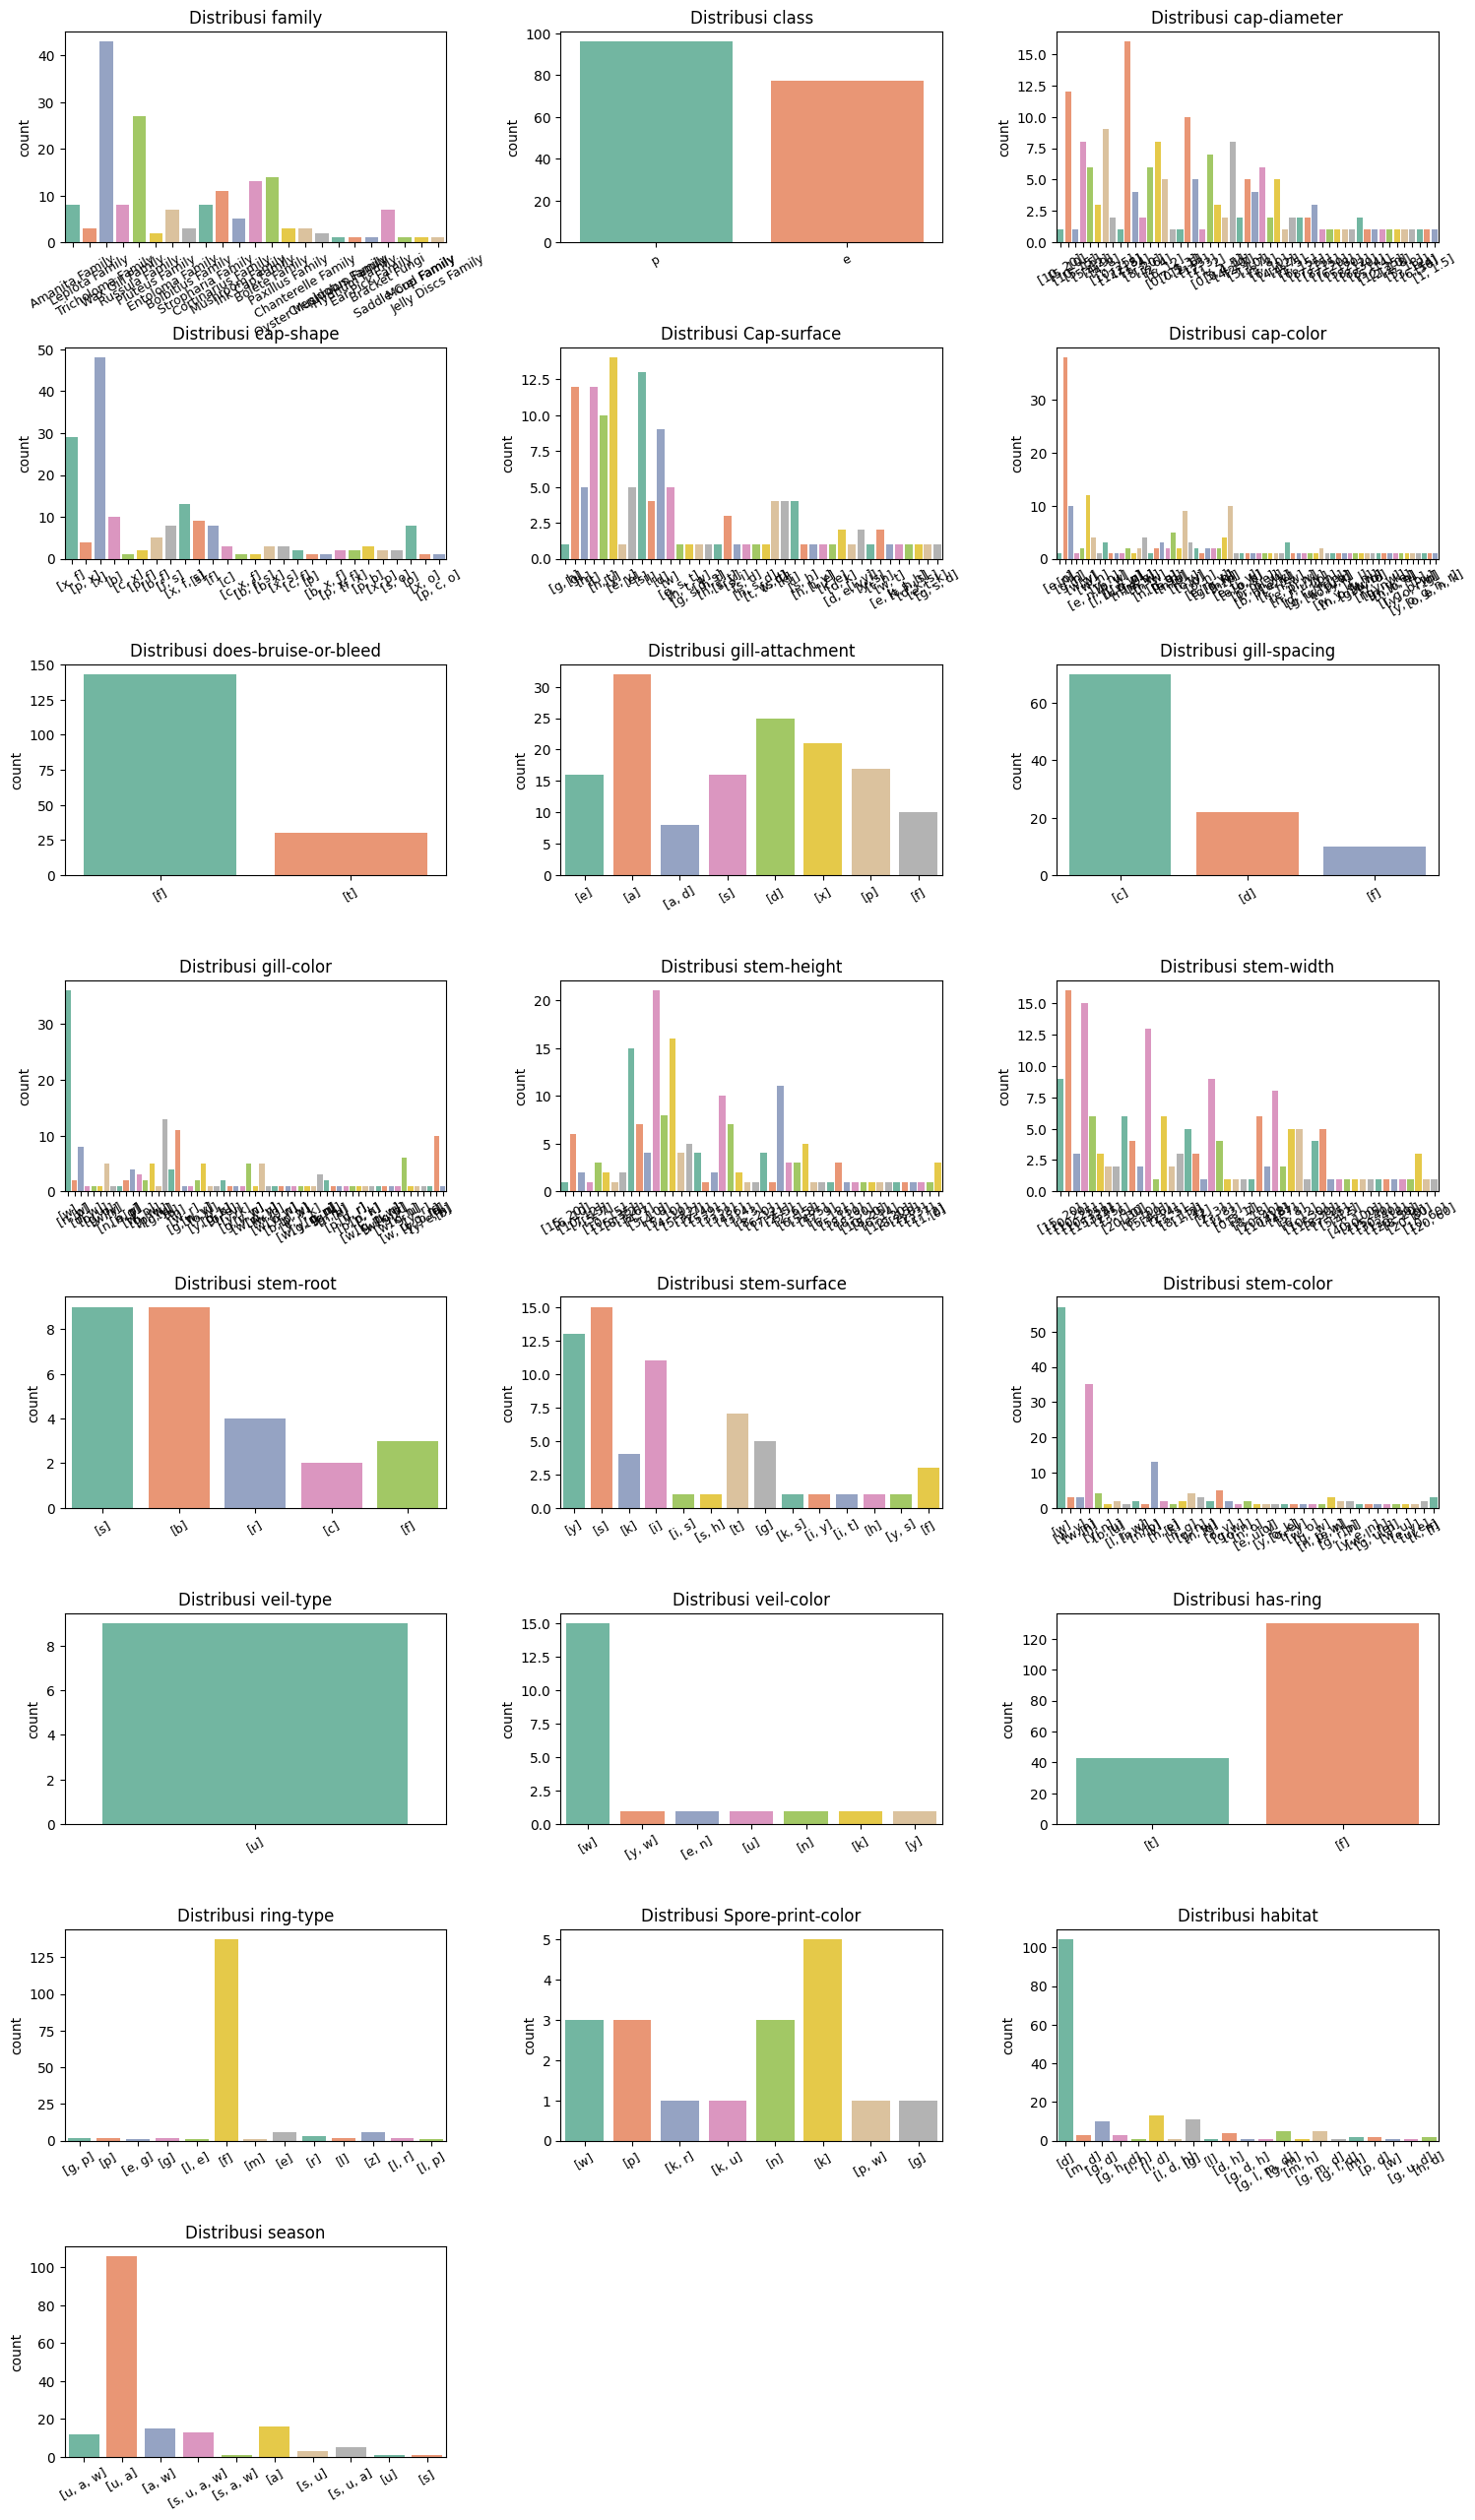

Tidak ada fitur numerik untuk divisualisasikan.


In [ ]:
# Menentukan kolom kategorikal dan numerik
categorical_features = df.select_dtypes(include=['object']).columns.drop(["name"])
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Visualisasi fitur kategorikal
if len(categorical_features) > 0:
    rows = (len(categorical_features) - 1) // 3 + 1
    fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(18, rows * 4))
    axes = axes.flatten()

    for idx, col in enumerate(categorical_features):
        sns.countplot(data=df, x=col, ax=axes[idx], palette='Set2')
        axes[idx].set_title(f'Distribusi {col}', fontsize=12)
        axes[idx].tick_params(axis='x', rotation=30, labelsize=9)
        axes[idx].set_xlabel("")

    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()
else:
    print("Tidak ada fitur kategorikal untuk divisualisasikan.")

# Visualisasi fitur numerik
if len(numerical_features) > 0:
    rows = (len(numerical_features) - 1) // 3 + 1
    fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(18, rows * 4))
    axes = axes.flatten()

    for idx, col in enumerate(numerical_features):
        sns.histplot(df[col], kde=True, ax=axes[idx], color='royalblue')
        axes[idx].set_title(f'Distribusi {col}', fontsize=12)
        axes[idx].tick_params(axis='x', rotation=30, labelsize=9)
        axes[idx].set_xlabel("")

    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()
else:
    print("Tidak ada fitur numerik untuk divisualisasikan.")

Gambar di atas menampilkan distribusi berbagai fitur dalam dataset jamur, yang mencakup atribut kategorikal dan numerik. Beberapa fitur kategorikal, seperti habitat, veil-type, dan ring-type, memiliki distribusi yang bervariasi, dengan kategori tertentu yang lebih sering muncul. Selain itu, fitur numerik seperti cap-diameter, stem-width, dan stem-height juga menunjukkan pola distribusi yang beragam. Beberapa atribut, seperti gill-color dan veil-color, mungkin memiliki hubungan dengan klasifikasi jamur karena distribusinya yang tidak merata. Secara keseluruhan, dataset ini menunjukkan adanya fitur dengan dominasi kategori tertentu, yang bisa memengaruhi model prediksi, sehingga perlu dilakukan teknik penyeimbangan data atau pemrosesan khusus sebelum analisis lebih lanjut.

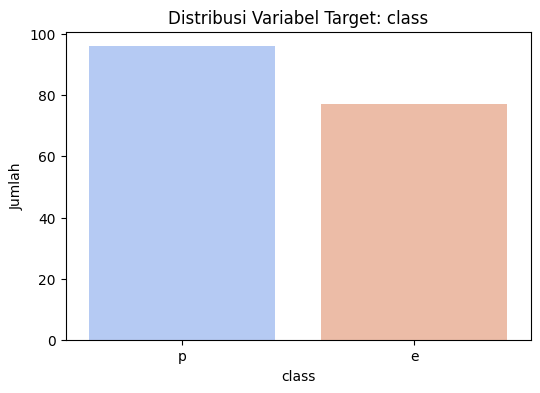

In [ ]:
target_variable = 'class'
if target_variable in df.columns:
    # Visualisasi distribusi target
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=target_variable, palette='coolwarm')
    plt.title(f'Distribusi Variabel Target: {target_variable}')
    plt.xlabel(target_variable)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=0)
    plt.show()
else:
    print(f"Variabel target '{target_variable}' tidak ditemukan dalam dataset.")


In [ ]:
df["class"].value_counts()

,count
class,
p,96
e,77


**Interpretasi Distribusi Variabel Target class**


Grafik di atas menunjukkan distribusi variabel target class, yang terdiri dari dua kategori: p dan e. Dari visualisasi ini, terlihat bahwa jumlah sampel dalam kedua kelas cukup seimbang, meskipun kelas p memiliki jumlah yang sedikit lebih banyak dibandingkan kelas e.

Dalam analisis ini, tidak akan dilakukan penanganan terhadap imbalance, karena perbedaan jumlah antar kelas masih dalam batas yang wajar dan tidak akan berdampak signifikan terhadap performa model. Dengan demikian, proses analisis dan pemodelan dapat langsung dilakukan tanpa perlu modifikasi pada distribusi data.

Langkah selanjutnya adalah menganalisis bagaimana fitur-fitur lain dalam dataset berkorelasi dengan variabel target ini, untuk memahami pola yang dapat membantu dalam proses prediksi atau pengambilan keputusan berdasarkan data ini.

#Data Pre-Processing

In [ ]:
df.isna().sum()

,0
family,0
name,0
class,0
cap-diameter,0
cap-shape,0
Cap-surface,40
cap-color,0
does-bruise-or-bleed,0
gill-attachment,28
gill-spacing,71


##Drop Kolom Yang Tidak Digunakan

In [ ]:
df = df.drop(['family','name','Spore-print-color','veil-color','veil-type','stem-surface','stem-root','gill-spacing','has-ring','stem-color'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   class                 173 non-null    object
 1   cap-diameter          173 non-null    object
 2   cap-shape             173 non-null    object
 3   Cap-surface           133 non-null    object
 4   cap-color             173 non-null    object
 5   does-bruise-or-bleed  173 non-null    object
 6   gill-attachment       145 non-null    object
 7   gill-color            173 non-null    object
 8   stem-height           173 non-null    object
 9   stem-width            173 non-null    object
 10  ring-type             166 non-null    object
 11  habitat               173 non-null    object
 12  season                173 non-null    object
dtypes: object(13)
memory usage: 17.7+ KB


##Labelling Target ke numeric

In [ ]:
df['class'] = df['class'].map({'e': 0, 'p': 1})

# Impute Missing Values in Categorical Columns

In [ ]:
columns_to_dummy = [
    'cap-shape', 'Cap-surface',  'does-bruise-or-bleed',
    'gill-attachment', 'ring-type', 'habitat', 'season',
    'cap-color','gill-color'
]

for col in columns_to_dummy:
    df[col] = df[col].fillna(df[col].mode()[0])




## Create Dummy Variables

In [ ]:
def manual_parse(val):
    if isinstance(val, str) and val.startswith("[") and val.endswith("]"):
        return val.strip("[]").replace(" ", "").split(",")
    return None


for col in columns_to_dummy:
    df[col] = df[col].apply(manual_parse)
    unique_labels = sorted(set(label for sublist in df[col].dropna() for label in sublist))
    for label in unique_labels:
        df[f"{col}_{label}"] = df[col].apply(lambda x: 1 if isinstance(x, list) and label in x else (None if x is None else 0))
    df.drop(columns=[col], inplace=True)
    if len(unique_labels) > 1:
        df.drop(columns=[f"{col}_{unique_labels[0]}"], inplace=True)



print(df.head())

   class cap-diameter stem-height stem-width  cap-shape_c  cap-shape_f  \
0      1     [10, 20]    [15, 20]   [15, 20]            0            1   
1      1      [5, 10]     [6, 10]   [10, 20]            0            0   
2      1     [10, 15]    [10, 12]   [10, 20]            0            1   
3      0      [5, 15]     [7, 15]   [10, 25]            0            1   
4      1      [5, 12]    [10, 12]   [10, 20]            0            1   

   cap-shape_o  cap-shape_p  cap-shape_s  cap-shape_x  ...  gill-color_f  \
0            0            0            0            1  ...             0   
1            0            1            0            1  ...             0   
2            0            0            0            1  ...             0   
3            0            0            0            1  ...             0   
4            0            0            0            1  ...             0   

   gill-color_g  gill-color_k  gill-color_n  gill-color_o  gill-color_p  \
0             0        

## Handling Numeric Feature

In [ ]:
columns_to_average = ['cap-diameter', 'stem-height', 'stem-width']

def parse_stem_value(val):
    if pd.isna(val) or val in ["", "[]"]:
        return None
    if isinstance(val, str):
        val = val.strip("[]").replace(" ", "")
        numbers = val.split(",")

        numbers = [num for num in numbers if num]

        try:
            numbers = list(map(float, numbers))

            if len(numbers) == 1:
                return numbers[0]
            elif len(numbers) == 2:
                return sum(numbers) / 2
            else:
                return None
        except ValueError:
            return None
    return None


for col in columns_to_average:
    df[col] = df[col].apply(parse_stem_value)





#Drop Low Variance and Duplicate Features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
target_column = 'class'
X_features = df.drop(columns=[target_column])

selector = VarianceThreshold(threshold=0.0)
X_reduced = selector.fit_transform(X_features)
selected_columns = X_features.columns[selector.get_support()]
removed_columns_var = X_features.columns[~selector.get_support()]

X_reduced_df = pd.DataFrame(X_reduced, columns=selected_columns)

original_columns = X_reduced_df.columns
X_reduced_df = X_reduced_df.loc[:, ~X_reduced_df.T.duplicated()]
removed_columns_dup = set(original_columns) - set(X_reduced_df.columns)

df_cleaned = X_reduced_df.copy()
df_cleaned[target_column] = df[target_column]

print("Shape df setelah hapus low variance dan duplikat:", df_cleaned.shape)
print("Kolom yang dihapus karena low variance:", removed_columns_var.tolist())
print("Kolom yang dihapus karena duplikat:", list(removed_columns_dup))

Shape df setelah hapus low variance dan duplikat: (173, 65)
Kolom yang dihapus karena low variance: []
Kolom yang dihapus karena duplikat: ['gill-color_f']


#Handling Multikolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

selected_cols = ["cap-diameter", "stem-height", "stem-width"]
df_vif = df_cleaned[selected_cols]

vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)


        feature       VIF
0  cap-diameter  5.590526
2    stem-width  5.320803
1   stem-height  3.537066


Semua nilai VIF < 10, artinya tidak ada multikolinearitas tinggi yang perlu dikhawatirkan. Namun, nilai cap-diameter dan stem-width yang >5 menunjukkan ada korelasi cukup kuat antar variabel, jadi tetap perlu diwaspadai.

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X = df_cleaned.drop(['class',], axis=1)
y = df_cleaned['class']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)


(138, 64)
(35, 64)


In [ ]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)

# Fit model logistik pakai statsmodels
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Tampilkan ringkasan model
print(result.summary())

         Current function value: 0.267680
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  138
Model:                          Logit   Df Residuals:                       73
Method:                           MLE   Df Model:                           64
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.6036
Time:                        03:37:13   Log-Likelihood:                -36.940
converged:                      False   LL-Null:                       -93.190
Covariance Type:            nonrobust   LLR p-value:                 0.0001736
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.5121      5.811     -0.604      0.546     -14.902       7.878
cap-diameter              -0.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#Data Modelling Before Feature selection

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm

In [ ]:
# Logistic Regression
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()
models = {"Logistic Regression": result}

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
models["Random Forest"] = rf

# XGBoost
xgb = XGBClassifier(n_estimators=5, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
models["XGBoost"] = xgb

# CatBoost
catb = CatBoostClassifier(iterations=5, random_state=42, verbose=0)
catb.fit(X_train, y_train)
models["CatBoost"] = catb

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=4, random_state=42)
gb.fit(X_train, y_train)
models["Gradient Boosting"] = gb

         Current function value: 0.267680
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Evaluasi Model: Logistic Regression
Akurasi Data Train = 88.4058%
Akurasi Data Test = 45.7143%


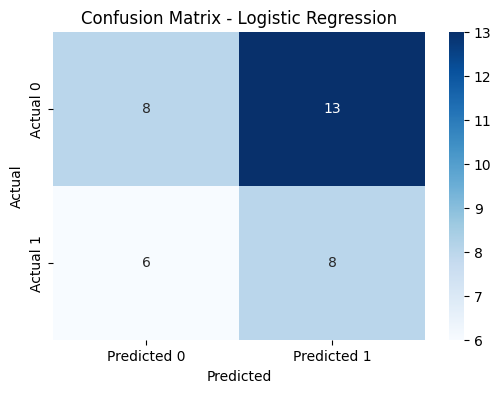

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.38      0.46        21
           1       0.38      0.57      0.46        14

    accuracy                           0.46        35
   macro avg       0.48      0.48      0.46        35
weighted avg       0.50      0.46      0.46        35


Evaluasi Model: Random Forest
Akurasi Data Train = 100.0000%
Akurasi Data Test = 62.8571%


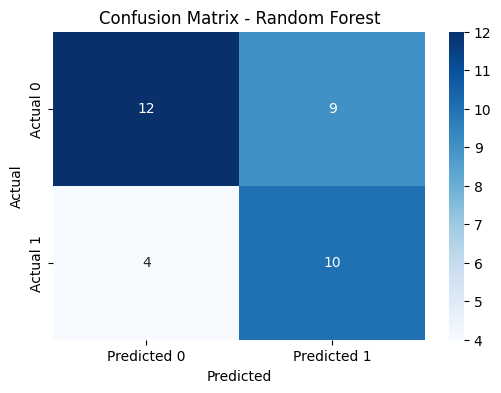

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.57      0.65        21
           1       0.53      0.71      0.61        14

    accuracy                           0.63        35
   macro avg       0.64      0.64      0.63        35
weighted avg       0.66      0.63      0.63        35


Evaluasi Model: XGBoost
Akurasi Data Train = 89.1304%
Akurasi Data Test = 51.4286%


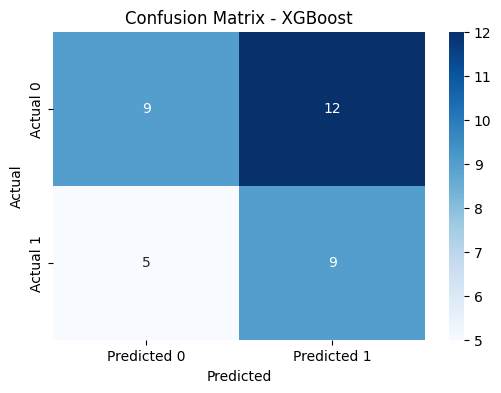

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.43      0.51        21
           1       0.43      0.64      0.51        14

    accuracy                           0.51        35
   macro avg       0.54      0.54      0.51        35
weighted avg       0.56      0.51      0.51        35


Evaluasi Model: CatBoost
Akurasi Data Train = 87.6812%
Akurasi Data Test = 42.8571%


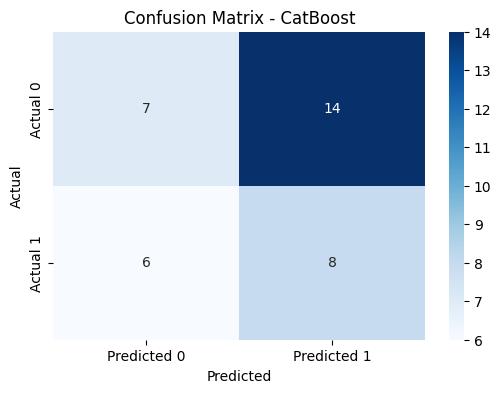

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.33      0.41        21
           1       0.36      0.57      0.44        14

    accuracy                           0.43        35
   macro avg       0.45      0.45      0.43        35
weighted avg       0.47      0.43      0.42        35


Evaluasi Model: Gradient Boosting
Akurasi Data Train = 100.0000%
Akurasi Data Test = 60.0000%


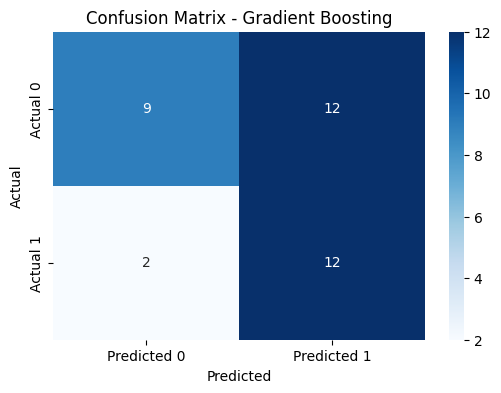

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.43      0.56        21
           1       0.50      0.86      0.63        14

    accuracy                           0.60        35
   macro avg       0.66      0.64      0.60        35
weighted avg       0.69      0.60      0.59        35



In [ ]:
# Evaluasi semua model
results = {}

for name, model in models.items():
    print("\n" + "="*40)
    print(f"Evaluasi Model: {name}")

    if name == "Logistic Regression":
        y_train_pred = (model.predict(sm.add_constant(X_train)) > 0.5).astype(int)
        y_test_pred = (model.predict(sm.add_constant(X_test)) > 0.5).astype(int)
    else:
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results[name] = {
        "y_train_pred": y_train_pred,
        "y_test_pred": y_test_pred,
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy
    }

    print(f"Akurasi Data Train = {train_accuracy*100:.4f}%")
    print(f"Akurasi Data Test = {test_accuracy*100:.4f}%")

    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))


***Evaluasi dan Interpretasi Model Klasifikasi***

1. Logistic Regression

Akurasi Training: 88.41% → cukup tinggi, menunjukkan model menangkap pola pada data latih.

Akurasi Testing: 45.71% → jauh lebih rendah dari training, indikasi overfitting.

F1-Score rata-rata: 0.46 → performa klasifikasi pada kedua kelas seimbang, namun rendah.

 Model terlalu sederhana untuk menangkap kompleksitas pola pada data, menghasilkan generalisasi yang buruk terhadap data test.

2. Random Forest

Akurasi Training: 100% → overfitting yang jelas.

Akurasi Testing: 62.86% → performa paling stabil dan relatif tinggi dibandingkan model lain.

F1-Score rata-rata: 0.63 → menunjukkan keseimbangan yang baik antara precision dan recall.

 Random Forest memberikan kompromi terbaik antara kompleksitas dan performa. Cocok digunakan bila tujuan adalah memaksimalkan akurasi prediksi.

3. XGBoost

Akurasi Training: 89.13% → lebih wajar daripada Random Forest dan Gradient
Boosting.

Akurasi Testing: 51.43% → hanya sedikit lebih baik dari tebak-tebakan acak.

F1-Score rata-rata: 0.51 → setara antara kelas 0 dan 1.

Performa moderat, namun stabilitas dan generalisasi lebih baik dibanding Logistic dan CatBoost. Perlu tuning parameter lebih lanjut.

4. CatBoost

Akurasi Training: 87.68%

Akurasi Testing: 42.86% → sangat rendah.

F1-Score rata-rata: 0.43 → performa klasifikasi buruk di kedua kelas.

Tidak direkomendasikan pada dataset ini karena performa lemah di data test. Bisa jadi karena belum optimal tuning hyperparameter atau kurang cocok dengan karakteristik data.

5. Gradient Boosting

Akurasi Training: 100% → sangat kuat di training, overfitting kemungkinan besar terjadi.

Akurasi Testing: 60.00% → cukup baik.

F1-Score rata-rata: 0.60 → keseimbangan prediksi yang baik antara kedua kelas.

Model ini sangat powerful dan mampu mempelajari pola dengan baik, namun terlalu fit terhadap data training. Dapat diperbaiki dengan regularisasi atau pruning.

***Kesimpulan***

Model terbaik secara keseluruhan adalah Random Forest. Model ini memiliki performa konsisten antara data train dan test, F1-score tertinggi, dan lebih tahan terhadap overfitting dibanding Gradient Boosting dan CatBoost

#Seleksi Variabel

## CheckingFeature Importance dengan p-value regresi logistic

In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  138
Model:                          Logit   Df Residuals:                       73
Method:                           MLE   Df Model:                           64
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.6036
Time:                        03:38:07   Log-Likelihood:                -36.940
converged:                      False   LL-Null:                       -93.190
Covariance Type:            nonrobust   LLR p-value:                 0.0001736
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.5121      5.811     -0.604      0.546     -14.902       7.878
cap-diameter              -0.1781      0.435     -0.409      0.682      -1.031       0.675
stem

Berdasarkan aturan P>|z| < 0.05, variabel yang signifikan dari output tersebut adalah:

cap-shape_x (P = 0.044)

gill-attachment_p (P = 0.036)

season_w (P = 0.024)

cap-color_e (P = 0.015)

cap-color_g (P = 0.012)

gill-color_n (P = 0.003)

gill-color_p (P = 0.002)

## Checking Feature Importance dengan Random Forest

In [ ]:
pd.set_option('display.max_rows', None)
feature_importance = rf.feature_importances_


importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


print(importance_df)

                   Feature  Importance
0             cap-diameter    0.105186
2               stem-width    0.096761
1              stem-height    0.082053
42                season_w    0.050251
23       gill-attachment_p    0.027462
43             cap-color_e    0.025622
57            gill-color_n    0.023410
4              cap-shape_f    0.022651
59            gill-color_p    0.021166
62            gill-color_w    0.021015
18           Cap-surface_y    0.017876
8              cap-shape_x    0.017845
33               habitat_g    0.017471
53             cap-color_y    0.017434
15           Cap-surface_s    0.015826
47             cap-color_n    0.015818
63            gill-color_y    0.015546
40                season_s    0.015524
41                season_u    0.015363
25       gill-attachment_x    0.015081
20       gill-attachment_d    0.014923
11           Cap-surface_h    0.014333
21       gill-attachment_e    0.013958
55            gill-color_g    0.013941
19  does-bruise-or-bleed_

Berdasarkan tabel di atas, fitur yang memiliki importance kurang dari 0.01 adalah:

- ring-type_g (0.009329)
- cap-color_u (0.009327)
- ring-type_r (0.008729)
- gill-attachment_f (0.008440)
- cap-color_k (0.007799)
- gill-color_e (0.006678)
- gill-color_r (0.006590)
- Cap-surface_i (0.006434)
- gill-color_u (0.004884)
- cap-color_l (0.004769)
- ring-type_m (0.003339)
- habitat_w (0.003143)
- habitat_p (0.001866)
- habitat_u (0.001053)

Fitur-fitur ini memiliki kontribusi yang sangat kecil dalam model dan bisa dipertimbangkan untuk dihapus dalam rangka seleksi fitur agar model lebih sederhana dan mungkin lebih akurat.

## Feature Selection Using PSO

In [ ]:
!pip install pyswarms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import accuracy_score
np.random.seed(42)
import pyswarms as ps


def objective_function(particle):
    total_features = X_train.shape[1]
    accuracies = np.zeros(particle.shape[0])

    for i, p in enumerate(particle):
        mask = p >= 0.5
        if np.sum(mask) == 0:
            accuracies[i] = 0
        else:
            X_train_p = X_train.iloc[:, mask]
            X_test_p = X_test.iloc[:, mask]

            model = RandomForestClassifier(n_estimators=100, random_state=42)
            model.fit(X_train_p, y_train)

            y_pred = model.predict(X_test_p)
            accuracies[i] = accuracy_score(y_test, y_pred)

    return 1 - accuracies
n_particles = 30
n_iterations = 50
options = {'c1': 1.4, 'c2': 1.65, 'w': 1.05,'k': 4,'p': 2}

dimensions = X_train.shape[1]
optimizer = ps.discrete.BinaryPSO(n_particles=n_particles, dimensions=dimensions, options=options)

best_cost, best_pos = optimizer.optimize(objective_function, iters=n_iterations)
mask = best_pos >= 0.5
X_train_selected = X_train.iloc[:, mask]
X_test_selected = X_test.iloc[:, mask]

2025-04-22 03:40:21,351 - pyswarms.discrete.binary - INFO - Optimize for 50 iters with {'c1': 1.4, 'c2': 1.65, 'w': 1.05, 'k': 4, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|50/50, best_cost=0.229
2025-04-22 03:45:14,234 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.22857142857142854, best pos: [0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0
 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0]


# Models After Feature Selection

In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm

In [ ]:
# Modeling
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=5, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=4, random_state=42)
}

results = {}

# Training dan prediksi untuk setiap model
for name, model in models.items():
    print(f"Training {name}...")

    model.fit(X_train_selected, y_train)
    y_train_pred = model.predict(X_train_selected)
    y_test_pred = model.predict(X_test_selected)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results[name] = {
        "model": model,
        "y_train_pred": y_train_pred,
        "y_test_pred": y_test_pred,
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy
    }

Training Logistic Regression...
Training Random Forest...
Training XGBoost...
Training CatBoost...
Training Gradient Boosting...



Evaluasi Model: Logistic Regression
Akurasi Data Train = 0.7391
Akurasi Data Test = 0.5429


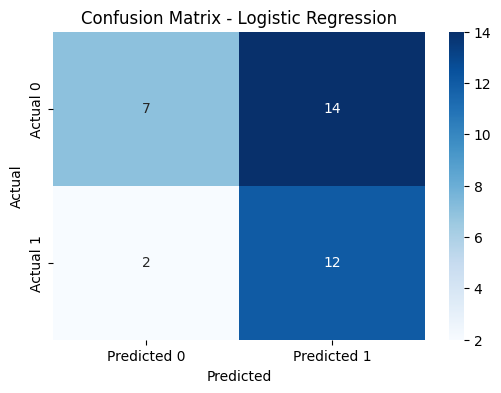

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.33      0.47        21
           1       0.46      0.86      0.60        14

    accuracy                           0.54        35
   macro avg       0.62      0.60      0.53        35
weighted avg       0.65      0.54      0.52        35


Evaluasi Model: Random Forest
Akurasi Data Train = 1.0000
Akurasi Data Test = 0.7714


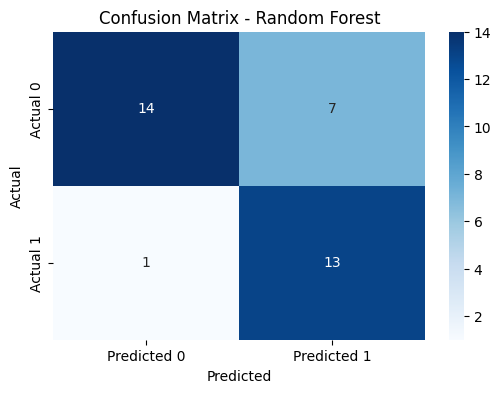

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78        21
           1       0.65      0.93      0.76        14

    accuracy                           0.77        35
   macro avg       0.79      0.80      0.77        35
weighted avg       0.82      0.77      0.77        35


Evaluasi Model: XGBoost
Akurasi Data Train = 0.8043
Akurasi Data Test = 0.6286


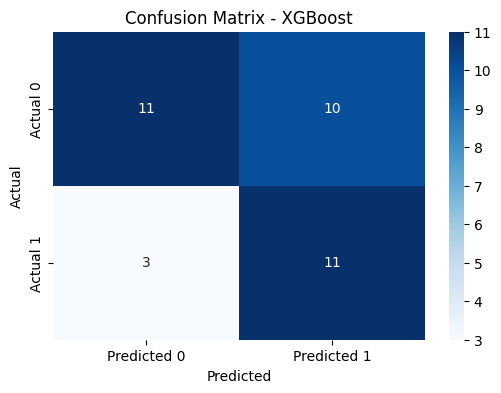

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.52      0.63        21
           1       0.52      0.79      0.63        14

    accuracy                           0.63        35
   macro avg       0.65      0.65      0.63        35
weighted avg       0.68      0.63      0.63        35


Evaluasi Model: CatBoost
Akurasi Data Train = 0.9783
Akurasi Data Test = 0.7143


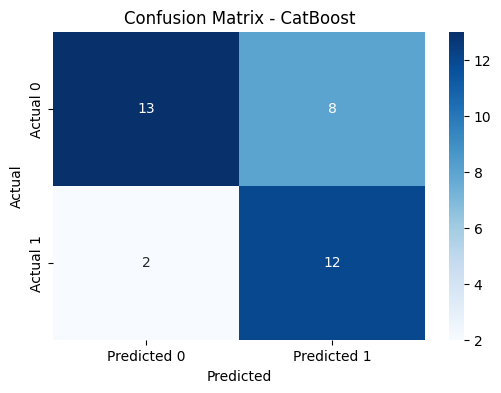

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.62      0.72        21
           1       0.60      0.86      0.71        14

    accuracy                           0.71        35
   macro avg       0.73      0.74      0.71        35
weighted avg       0.76      0.71      0.72        35


Evaluasi Model: Gradient Boosting
Akurasi Data Train = 1.0000
Akurasi Data Test = 0.6286


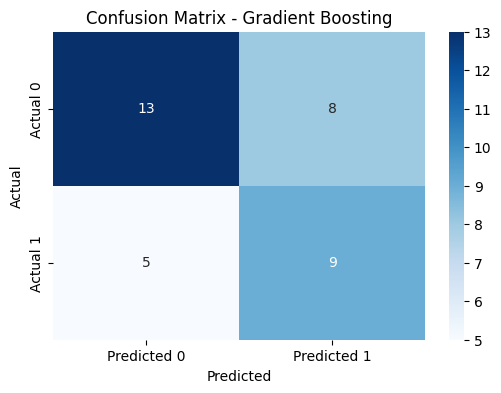

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        21
           1       0.53      0.64      0.58        14

    accuracy                           0.63        35
   macro avg       0.63      0.63      0.62        35
weighted avg       0.65      0.63      0.63        35



In [ ]:
# Evaluasi semua model
for name, result in results.items():
    print("\n" + "="*40)
    print(f"Evaluasi Model: {name}")
    print(f"Akurasi Data Train = {result['train_accuracy']:.4f}")
    print(f"Akurasi Data Test = {result['test_accuracy']:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, result['y_test_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, result['y_test_pred']))


***Evaluasi dan Interpretasi Model Klasifikasi setelah Feature Selection***

1. Logistic Regression

Akurasi Training: 73.91%

Akurasi Testing: 54.29% (↑ dari 45.71%)

F1-score rata-rata: 0.53

Terjadi peningkatan recall untuk kelas 1 (positif) dari 0.57 menjadi 0.86, yang berarti model lebih baik dalam mengenali kelas minoritas. Feature selection berhasil meningkatkan kemampuan generalisasi Logistic Regression. Meski f1-score masih rendah, peningkatan recall menjadikan model ini lebih aware terhadap kelas positif—penting dalam konteks prediksi yang bersifat sensitif (misal: fraud detection, diagnosis penyakit).

2. Random Forest

Akurasi Training: 100% (tetap)

Akurasi Testing: 77.14% (↑ dari 62.86%)

F1-score rata-rata: 0.77 (↑ dari 0.63)

Ini adalah peningkatan paling signifikan di antara semua model. Feature selection membantu Random Forest untuk lebih fokus pada fitur-fitur yang relevan, mengurangi noise, dan akhirnya meningkatkan performa di data test. Model ini kini menjadi kandidat terbaik secara keseluruhan.

3. XGBoost

Akurasi Training: 80.43%

Akurasi Testing: 62.86% (↑ dari 51.43%)

F1-score rata-rata: 0.63

Peningkatan akurasi test menunjukkan perbaikan generalisasi. Tidak sebesar Random Forest, tapi tetap menjadi pilihan yang solid. Model ini lebih seimbang antara kelas 0 dan 1, cocok jika klasifikasi dua arah sama pentingnya.

4. CatBoost

Akurasi Training: 97.83%

Akurasi Testing: 71.43% (↑ dari 42.86%)

F1-score rata-rata: 0.71

Lonjakan drastis dalam akurasi test dan keseimbangan antara precision-recall menunjukkan bahwa CatBoost sangat diuntungkan oleh feature selection. Ini menunjukkan bahwa CatBoost butuh data bersih dan relevan untuk performa optimal.

5. Gradient Boosting

Akurasi Training: 100%

Akurasi Testing: 62.86% (↑ dari 60.00%)

F1-score rata-rata: 0.62

 Peningkatan kecil, tapi tetap konsisten. Model ini masih overfit (akurasi training 100%), dan mungkin perlu penyesuaian hyperparameter untuk hasil optimal.


**Kesimpulan**

Feature selection berhasil meningkatkan performa semua model, terutama Random Forest dan CatBoost. Disarankan untuk melakukan tuning hyperparameter lanjutan dan eksplorasi cross-validation untuk mendapatkan estimasi performa yang lebih stabil dan adil.

#Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dictionary untuk menyimpan model terbaik dan hasilnya
best_models = {}

# Hyperparameter tuning untuk setiap model
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 500],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "XGBoost": {
        "n_estimators": [100, 500, 1000],
        "max_depth": [3, 6, 10],
        "learning_rate": [0.01, 0.1, 0.2]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 500, 1000],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "CatBoost": {
        "iterations": [100, 500, 1000],
        "learning_rate": [0.01, 0.1, 0.2],
        "depth": [3, 6, 10]
    }
}

# Daftar model
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=2000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Looping untuk melakukan tuning dan training
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")

    search = RandomizedSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_iter=10, random_state=42, n_jobs=-1)
    search.fit(X_train_selected, y_train)

    # Simpan model terbaik
    best_models[name] = search.best_estimator_

    # Evaluasi model terbaik
    y_train_pred = best_models[name].predict(X_train_selected)
    y_test_pred = best_models[name].predict(X_test_selected)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Best parameters for {name}: {search.best_params_}")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}\n")

Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'solver': 'liblinear', 'C': 0.1}
Train Accuracy: 0.6594, Test Accuracy: 0.4571

Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 30}
Train Accuracy: 0.9420, Test Accuracy: 0.6857

Tuning hyperparameters for XGBoost...
Best parameters for XGBoost: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
Train Accuracy: 0.7536, Test Accuracy: 0.5714

Tuning hyperparameters for Gradient Boosting...
Best parameters for Gradient Boosting: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
Train Accuracy: 0.8116, Test Accuracy: 0.6286

Tuning hyperparameters for CatBoost...
Best parameters for CatBoost: {'learning_rate': 0.01, 'iterations': 500, 'depth': 10}
Train Accuracy: 0.9710, Test Accuracy: 0.7143



Berdasarkan hasil hyperparameter tuning, performa model dapat disimpulkan sebagai berikut:

1. Logistic Regression

Best Parameters: solver='liblinear', C=0.1

Akurasi Training: 65.94%

Akurasi Testing: 45.71%

Interpretasi:

Tuning menghasilkan model yang lebih sederhana dengan regularisasi lebih kuat (C=0.1), yang seharusnya membantu menghindari overfitting. Namun, akurasi testing tidak mengalami perbaikan dibanding sebelum tuning (stagnan di ~45%). Logistic Regression tidak cukup fleksibel untuk menangkap kompleksitas data ini, meski sudah di-tune.

2. Random Forest

Best Parameters: n_estimators=200, min_samples_split=5, max_depth=30

Akurasi Training: 94.20%

Akurasi Testing: 68.57%

Interpretasi:

Performa test meningkat secara signifikan setelah tuning.
Meski akurasi training tetap tinggi, adanya sedikit penurunan dibanding sebelumnya (dari 100% → 94%) menunjukkan bahwa overfitting mulai berkurang. Parameter yang dipilih berhasil menyeimbangkan bias-variance trade-off, menjadikan Random Forest tetap salah satu model terbaik.

3. XGBoost

Best Parameters: n_estimators=100, max_depth=3, learning_rate=0.01

Akurasi Training: 75.36%

Akurasi Testing: 57.14%

Interpretasi:

Dengan parameter yang lebih konservatif (max_depth=3, learning_rate=0.01), model menjadi lebih robust dan menghindari overfitting. Namun, meskipun stabil, akurasi test masih belum optimal. XGBoost tetap pilihan bagus bila interpretabilitas dan kontrol atas kompleksitas model dibutuhkan.

4. Gradient Boosting

Best Parameters: n_estimators=100, max_depth=3, learning_rate=0.01

Akurasi Training: 81.16%

Akurasi Testing: 62.86%

Interpretasi:

Sama seperti XGBoost, performa model menjadi lebih stabil pasca tuning. Tuning membuat model lebih seimbang antara kompleksitas dan generalisasi. Bisa menjadi alternatif kuat jika Random Forest atau CatBoost terlalu kompleks untuk deployment.

5. CatBoost

Best Parameters: learning_rate=0.01, iterations=500, depth=10

Akurasi Training: 97.10%

Akurasi Testing: 71.43%

Interpretasi:

Model dengan performa test tertinggi kedua setelah tuning.
CatBoost tampaknya sangat cocok dengan karakteristik data ini, terutama setelah tuning dilakukan secara agresif pada jumlah iterasi dan kedalaman. CatBoost menunjukkan stabilitas luar biasa serta akurasi tinggi, menjadikannya kandidat utama untuk model akhir.





## Pemilihan Model Terbaik

***Kesimpulan Akhir Evaluasi Model***


**Tahap 1: Sebelum Feature Selection (Baseline Modeling)**

Pada tahap awal, seluruh fitur digunakan tanpa proses seleksi. Model **Random Forest dan Gradient Boosting **menunjukkan performa terbaik dengan akurasi data uji masing-masing sebesar 62,86% dan 60,00%. Sementara itu, model Logistic Regression mengalami overfitting yang cukup besar dengan selisih akurasi data latih (88%) dan data uji (45%). CatBoost dan XGBoost belum memberikan hasil yang optimal pada tahap ini.


**Tahap 2: Setelah Feature Selection**

Setelah dilakukan seleksi fitur, kinerja model meningkat secara signifikan. **Random Forest** mencatatkan akurasi uji tertinggi sebesar 77,14%, diikuti oleh CatBoost dengan 71,43%. Model lain seperti XGBoost dan Gradient Boosting juga menunjukkan peningkatan performa. Logistic Regression mengalami peningkatan yang relatif kecil namun tetap tidak kompetitif dibanding model ensemble.


**Tahap 3: Setelah Hyperparameter Tuning**

Setelah dilakukan tuning hyperparameter, **CatBoost** tetap menunjukkan akurasi terbaik sebesar 71,43% dengan performa yang sangat stabil. Random Forest menyusul dengan akurasi 68,57%. Model boosting lainnya seperti XGBoost dan Gradient Boosting berada pada kisaran 57% hingga 63%, dengan peningkatan kestabilan dan pengurangan overfitting. Logistic Regression tetap memiliki performa terendah dengan akurasi data uji 45,71%.



***Model Terbaik yang Direkomendasikan***

Berdasarkan hasil evaluasi pada ketiga tahap, model yang direkomendasikan adalah:


*   **CatBoost** karena akurasi Uji Tertinggi dan Stabil: 71,43%, kuat dalam menangani fitur kategorik, dan tahan terhadap overfitting setelah tuning.
*   Alternatif Kuat lainnya adalah **Random Forest** karena akurasi tinggi dan stabil dan cocok untuk kebutuhan deployment yang lebih sederhana




